<a href="https://colab.research.google.com/github/ruchi243/Sales_Analysis_and_Forecasting/blob/main/Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Forecasting**

### **Logistic Regression**

In [398]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [399]:
url = 'https://raw.githubusercontent.com/ruchi243/Exploratory_Data_Analysis/main/Sample%20-%20Superstore.csv'

In [400]:
import datetime as dt
dataset = pd.read_csv(url)

dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])
dataset['Order Month'] = pd.to_datetime(dataset['Order Date']).dt.month
dataset['Order Year'] = pd.to_datetime(dataset['Order Date']).dt.year
dataset.drop(["Row ID", "Customer ID","Order ID","Postal Code","Product ID","Product Name","Country","Ship Date"], axis = 1, inplace = True)


display(dataset.head())

,Order Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Month,Order Year
0,2016-11-08,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,11,2016
1,2016-11-08,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,11,2016
2,2016-06-12,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,6,2016
3,2015-10-11,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,10,2015
4,2015-10-11,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,10,2015


In [401]:
dataset['Profit/Loss']=np.where(dataset.Profit>0,'P','L')
dataset.head()

,Order Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Month,Order Year,Profit/Loss
0,2016-11-08,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,11,2016,P
1,2016-11-08,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,11,2016,P
2,2016-06-12,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,6,2016,P
3,2015-10-11,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,10,2015,L
4,2015-10-11,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,10,2015,P


In [402]:
encoder = LabelEncoder()


In [403]:
dataset['Profit/Loss']=encoder.fit_transform(dataset['Profit/Loss'])
dataset['City']=encoder.fit_transform(dataset['City'])
dataset['Segment']=encoder.fit_transform(dataset['Segment'])
dataset['Ship Mode']=encoder.fit_transform(dataset['Ship Mode'])
dataset['State']=encoder.fit_transform(dataset['State'])
dataset['Region']=encoder.fit_transform(dataset['Region'])
dataset['Category']=encoder.fit_transform(dataset['Category'])
dataset['Sub-Category']=encoder.fit_transform(dataset['Sub-Category'])

In [404]:
dataset.head()

,Order Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Month,Order Year,Profit/Loss
0,2016-11-08,2,Claire Gute,0,194,15,2,0,4,261.9600,2,0.00,41.9136,11,2016,1
1,2016-11-08,2,Claire Gute,0,194,15,2,0,5,731.9400,3,0.00,219.5820,11,2016,1
2,2016-06-12,2,Darrin Van Huff,1,266,3,3,1,10,14.6200,2,0.00,6.8714,6,2016,1
3,2015-10-11,3,Sean O'Donnell,0,153,8,2,0,16,957.5775,5,0.45,-383.0310,10,2015,0
4,2015-10-11,3,Sean O'Donnell,0,153,8,2,1,14,22.3680,2,0.20,2.5164,10,2015,1


In [405]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [406]:
x = dataset.iloc[:, [1,3,5,6,7,8,10]].values
 
# output
y = dataset.iloc[:, 15].values

In [407]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
        x, y, test_size = 0.25, random_state = 0)

In [408]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
 
print (xtrain[0:10, :])

[[-2.03361949  1.76485055  0.88872229 -0.49810215  0.03402382 -0.90846701
  -0.35207796]
 [ 0.69710217  0.45376374 -1.3713143   1.22627457  1.61792777  1.06594586
   0.5541117 ]
 [ 0.69710217 -0.85732308  1.46987456  1.22627457  0.03402382  0.473622
   1.91339618]
 [-2.03361949  0.45376374 -1.24216935  1.22627457 -1.54988013  0.27618071
  -1.25826761]
 [ 0.69710217 -0.85732308  0.50128745 -0.49810215  0.03402382  0.86850458
  -0.35207796]
 [-0.21313838  0.45376374 -1.24216935  1.22627457  1.61792777 -1.50079087
   0.5541117 ]
 [-0.21313838  1.76485055 -0.59644461 -1.36029051  0.03402382 -0.90846701
  -0.35207796]
 [ 0.69710217  0.45376374  1.14701219  0.36408621  0.03402382  1.26338715
  -1.25826761]
 [-0.21313838  0.45376374 -1.24216935  1.22627457  0.03402382  1.26338715
  -0.80517278]
 [ 0.69710217  1.76485055  0.56585992  0.36408621  0.03402382 -0.90846701
   0.5541117 ]]


In [409]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [410]:
y_pred = classifier.predict(xtest)

In [411]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[  36  436]
 [   9 2018]]


In [412]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


auc = roc_auc_score(ytest, y_pred)


In [413]:
(36+2018)/(360+134+8+1997)

0.8219287715086034

In [414]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.8219287715086034


Text(0, 0.5, 'True Positive Rate')

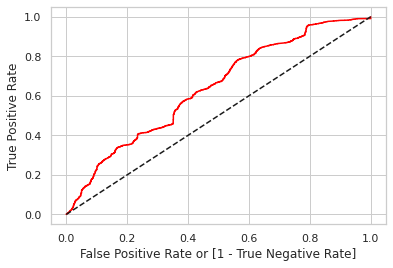

In [415]:
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])


import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### **K-Neighbors Classifier**

In [416]:
import numpy as np
from pandas import read_csv

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [417]:
num_folds = 10
kfold = KFold(n_splits=10)

In [418]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [419]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [420]:
print(grid.best_score_)
print(grid.best_params_)

0.9017420622223025
{'n_neighbors': 5}


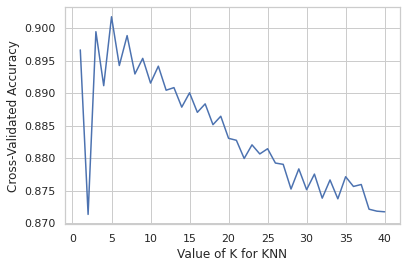

In [421]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [422]:
accuracy = grid.best_score_*100
print(accuracy)

90.17420622223025


## **Decision Tree**

In [423]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [424]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor

In [425]:
model2 = DecisionTreeRegressor()


In [426]:
model2.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [427]:
model2.score(xtest,ytest)

0.521661433193905

In [428]:
le = preprocessing.LabelEncoder()
dataset['Profit/Loss']= le.fit_transform(dataset['Profit/Loss']) 

In [429]:
model3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model3.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

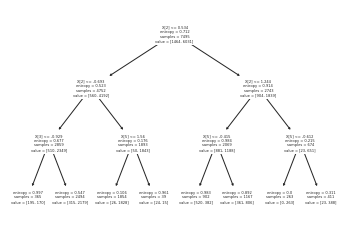

In [430]:
tree.plot_tree(model3);

[Text(0.5, 0.875, 'X[2] <= 0.534\nentropy = 0.712\nsamples = 7495\nvalue = [1464, 6031]'),
 Text(0.25, 0.625, 'X[2] <= -0.693\nentropy = 0.523\nsamples = 4752\nvalue = [560, 4192]'),
 Text(0.125, 0.375, 'X[3] <= -0.929\nentropy = 0.677\nsamples = 2859\nvalue = [510, 2349]'),
 Text(0.0625, 0.125, 'entropy = 0.997\nsamples = 365\nvalue = [195, 170]'),
 Text(0.1875, 0.125, 'entropy = 0.547\nsamples = 2494\nvalue = [315, 2179]'),
 Text(0.375, 0.375, 'X[5] <= 1.56\nentropy = 0.176\nsamples = 1893\nvalue = [50, 1843]'),
 Text(0.3125, 0.125, 'entropy = 0.106\nsamples = 1854\nvalue = [26, 1828]'),
 Text(0.4375, 0.125, 'entropy = 0.961\nsamples = 39\nvalue = [24, 15]'),
 Text(0.75, 0.625, 'X[2] <= 1.244\nentropy = 0.914\nsamples = 2743\nvalue = [904, 1839]'),
 Text(0.625, 0.375, 'X[5] <= -0.415\nentropy = 0.984\nsamples = 2069\nvalue = [881, 1188]'),
 Text(0.5625, 0.125, 'entropy = 0.983\nsamples = 902\nvalue = [520, 382]'),
 Text(0.6875, 0.125, 'entropy = 0.892\nsamples = 1167\nvalue = [361, 8

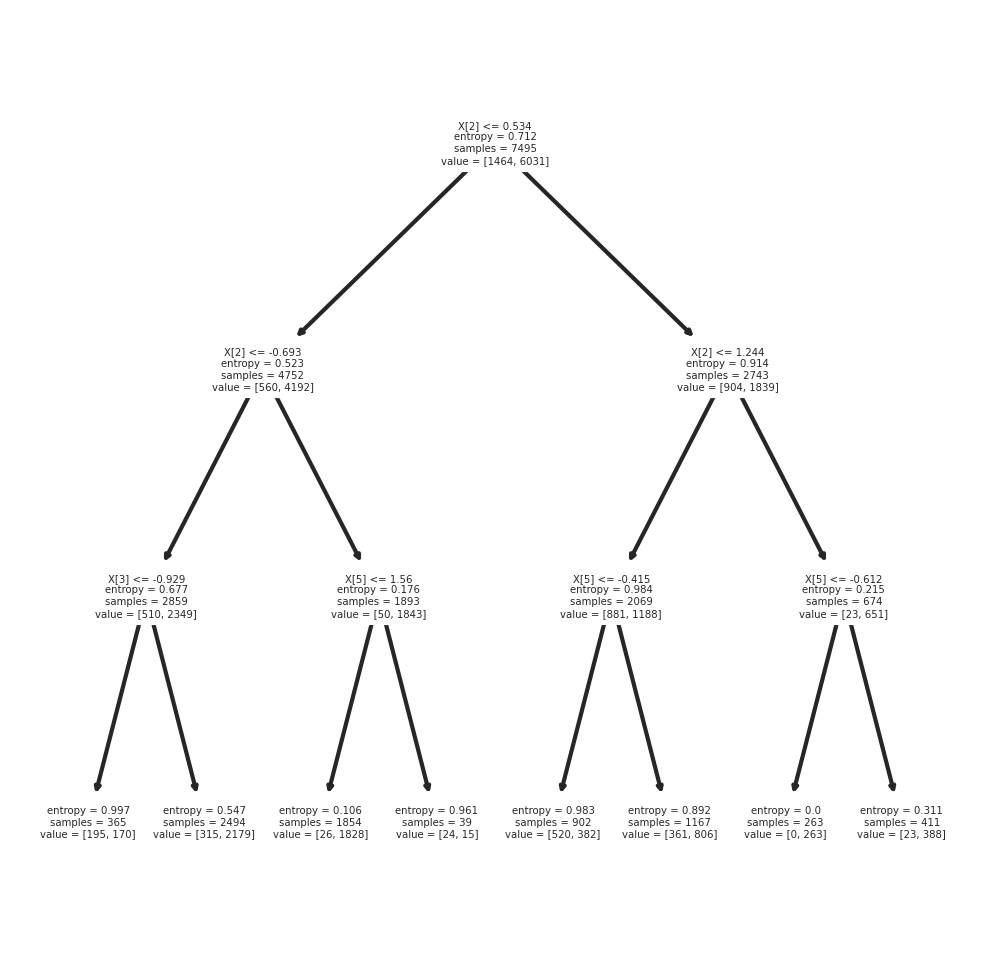

In [431]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300) #resolution in dots per inch
tree.plot_tree(model3)

In [432]:
preds = model2.predict(xtest) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1.000000    1965
0.000000     448
0.500000      41
0.666667      11
0.333333       9
0.750000       8
0.272727       4
0.800000       3
0.250000       2
0.714286       2
0.454545       2
0.857143       1
0.700000       1
0.166667       1
0.600000       1
dtype: int64

In [433]:
pd.crosstab(ytest,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0.000000,0.166667,0.250000,0.272727,0.333333,0.454545,0.500000,0.600000,0.666667,0.700000,0.714286,0.750000,0.800000,0.857143,1.000000
row_0,,,,,,,,,,,,,,,
0,365,1,2,2,1,1,16,0,1,0,1,0,1,1,80
1,83,0,0,2,8,1,25,1,10,1,1,8,2,0,1885
